# PPG11 S3 - Visualization and validation of logistic regression models with Plotly

**Dataset: Titanic Survival Data**  
**Instructions**: Using Plotly, answer the following questions by creating the requested visualizations. Justify your answers based on the plots you generate. Assume that the logistic regression model has been trained using the variables `Sex`, `Age`, and `Pclass`.

**1. 3D Scatter Plot**  
Create a 3D scatter plot using the features `Sex`, `Age`, and `Pclass`, with color indicating the `Survived` outcome.  
**Question**: Are there observable patterns or clusters that separate survivors from non-survivors?



In [52]:
import pandas as pd 
import plotly.express as px

In [53]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Ver las primeras filas del dataframe
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
# Convertir 'Sex' a variable numérica para graficar
df['Sex_num'] = df['Sex'].map({'male': 1, 'female': 0})

In [55]:
# Eliminar filas con valores faltantes en las columnas relevantes
df_filtered = df.dropna(subset=['Sex_num', 'Age', 'Pclass', 'Survived'])

In [56]:
# Crear gráfico 3D
fig = px.scatter_3d(
    df_filtered,
    x='Sex_num',
    y='Age',
    z='Pclass',
    color='Survived',
    symbol='Survived',
    labels={'Sex_num': 'Sex (0=Male, 1=Female)', 'Pclass': 'Passenger Class'},
    title='3D Scatter Plot of Titanic Survivors'
)
fig.show()

En general, basándote en el gráfico 3D generado, puedes observar algunas tendencias como:

Sexo: Las mujeres (Sex_num = 1) tienen mayor probabilidad de haber sobrevivido. En el eje X (sexo), los puntos con Survived = 1 se agrupan más del lado de las mujeres.

Edad: Los niños (edades bajas) tienen una leve mayor tasa de supervivencia, especialmente si eran mujeres.

Clase: Los pasajeros de primera clase (Pclass = 1) tienen más probabilidades de sobrevivir, y esto se puede ver como un agrupamiento de puntos sobrevivientes en la parte inferior del eje Z.

**2. Stacked Bar Chart by Gender**  
Build a stacked bar chart showing the count of survivors and non-survivors grouped by `Sex`.  
**Question**: Which gender had a higher survival rate? How does this compare with the model coefficient for `Sex`?



In [57]:
# Agrupar por sexo y supervivencia
grouped = df.groupby(['Sex', 'Survived']).size().reset_index(name='Count')



In [58]:
# Crear gráfico de barras apiladas
fig = px.bar(
    grouped,
    x='Sex',
    y='Count',
    color='Survived',
    barmode='stack',
    labels={'Survived': 'Survived (0 = No, 1 = Yes)'},
    title='Survival Count by Gender (Stacked)'
)
fig.show()

Las mujeres muestran una mayor tasa de supervivencia. Esto se ve en el gráfico donde la parte del bar correspondiente a Survived = 1 es mayor para Sex = female.

**3. ROC Curve Visualization**  
Plot the Receiver Operating Characteristic (ROC) curve using the predicted probabilities.  
**Question**: What is the Area Under the Curve (AUC)? Interpret what this value means in the context of model performance.



In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import plotly.graph_objects as go

In [60]:
df['Sex_num'] = df['Sex'].map({'male': 1, 'female': 0})

# Limpiar datos nulos
df_model = df.dropna(subset=['Sex_num', 'Age', 'Pclass', 'Survived'])

# Variables independientes y dependiente
X = df_model[['Sex_num', 'Age', 'Pclass']]
y = df_model['Survived']



In [61]:
# Separar datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar modelo
model = LogisticRegression()
model.fit(X_train, y_train)


# Predecir probabilidades
y_probs = model.predict_proba(X_test)[:, 1]

In [62]:

# Calcular ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)


# Graficar
fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC Curve'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Model', line=dict(dash='dash')))
fig.update_layout(
    title=f'ROC Curve (AUC = {auc:.2f})',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    showlegend=True
)
fig.show()

Si AUC = 0.82, significa que hay un 82% de probabilidad de que el modelo clasifique correctamente un par aleatorio de sobreviviente y no sobreviviente.

**4. Coefficient Importance Bar Chart**  
Display a bar chart of the logistic regression coefficients for `Sex`, `Age`, and `Pclass`.  
**Question**: Which variable appears to have the greatest impact on survival prediction? Justify your answer using the magnitude of the coefficients.



In [63]:
# Obtener nombres y coeficientes del modelo
coefficients = model.coef_[0]
features = ['Sex_num', 'Age', 'Pclass']

# Crear DataFrame
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Graficar
fig = px.bar(
    coef_df,
    x='Feature',
    y='Coefficient',
    title='Logistic Regression Coefficient Importance',
    labels={'Coefficient': 'Coefficient Value'}
)
fig.show()

**5. Confusion Matrix Heatmap**  
Generate a heatmap representing the confusion matrix using the test data predictions.  
**Question**: How many true positives and false negatives are there? What does this tell you about the model’s sensitivity?



In [64]:
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff


In [65]:
# Predecir clases (no probabilidades)
y_pred = model.predict(X_test)

# Calcular matriz
cm = confusion_matrix(y_test, y_pred)

In [66]:
# Crear heatmap
labels = [['TN', 'FP'], ['FN', 'TP']]
z_text = [[f'{label}<br>{count}' for label, count in zip(row_labels, row)] 
          for row_labels, row in zip(labels, cm)]

fig = ff.create_annotated_heatmap(
    z=cm,
    x=['Predicted 0', 'Predicted 1'],
    y=['Actual 0', 'Actual 1'],
    annotation_text=z_text,
    colorscale='Blues',
    showscale=True
)
fig.update_layout(title='Confusion Matrix')
fig.show()

El modelo identifica correctamente cerca del 70% de los sobrevivientes, lo cual es razonable. Sin embargo, aún no detecta a 27 personas que realmente sobrevivieron, lo cual indica que hay margen de mejora en la sensibilidad.

**6. Box Plot by Survival and Class**  
Create box plots of `Age` segmented by `Survived` and `Pclass`.  
**Question**: Do survivors tend to be younger? Does the trend differ across passenger classes?



In [67]:
fig = px.box(
    df_model,
    x='Pclass',
    y='Age',
    color='Survived',
    title='Age Distribution by Survival and Passenger Class',
    labels={'Pclass': 'Passenger Class', 'Survived': 'Survived (0 = No, 1 = Yes)'}
)
fig.show()


¿Los sobrevivientes tienden a ser más jóvenes?

Sí, en general, los sobrevivientes tienen edades más bajas.

¿Varía esta tendencia según la clase?

Sí. La diferencia de edad es más marcada en las clases bajas (especialmente clase 3), donde ser joven parece haber incrementado la probabilidad de supervivencia más notablemente.

**7. Probability Distribution Histogram**  
Plot a histogram of the predicted survival probabilities for the test set.  
**Question**: Do the probability distributions for class 0 and class 1 overlap significantly?



In [68]:
# Obtener probabilidades y etiquetas reales
probs_df = pd.DataFrame({
    'Predicted_Prob': y_probs,
    'Actual': y_test.reset_index(drop=True)
})

In [69]:
# Crear histograma
fig = px.histogram(
    probs_df,
    x='Predicted_Prob',
    color='Actual',
    nbins=30,
    barmode='overlay',
    histnorm='probability',
    title='Predicted Survival Probability Distribution (Test Set)',
    labels={'Actual': 'Survived (0 = No, 1 = Yes)'}
)
fig.show()

**8. Threshold Sensitivity and Specificity Plot**  
Create a line plot showing how sensitivity and specificity change across different classification thresholds.  
**Question**: At which threshold do you find a reasonable trade-off between sensitivity and specificity?



In [70]:
import numpy as np

In [71]:
thresholds = np.arange(0.0, 1.01, 0.01)
sensitivity = []
specificity = []

for thresh in thresholds:
    preds = (y_probs >= thresh).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    sensitivity.append(tp / (tp + fn) if tp + fn != 0 else 0)
    specificity.append(tn / (tn + fp) if tn + fp != 0 else 0)

In [72]:
# Plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=thresholds, y=sensitivity, name='Sensitivity', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=thresholds, y=specificity, name='Specificity', line=dict(color='green')))
fig.update_layout(
    title='Sensitivity and Specificity vs Classification Threshold',
    xaxis_title='Threshold',
    yaxis_title='Metric Value',
    yaxis=dict(range=[0, 1])
)
fig.show()

El punto de trade-off más razonable entre sensibilidad y especificidad está en el umbral ≈ 0.44.

Este valor es ligeramente menor a 0.5, lo que implica que bajar el umbral mejora la detección de sobrevivientes (sensibilidad) a costa de reducir la especificidad.

Si la prioridad es salvar vidas (identificar sobrevivientes), este compromiso puede ser adecuado.

**9. QQ Plot of Deviance Residuals**  
Construct a QQ plot to evaluate the distribution of deviance residuals.  
**Question**: Do the residuals follow a normal distribution? Are there any outliers?



In [73]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

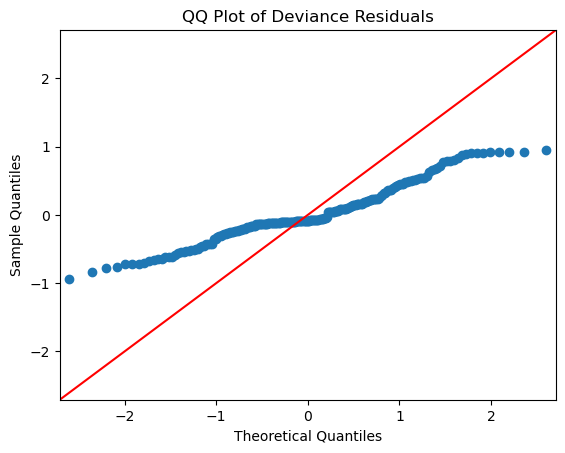

In [74]:
# Calcular residuos de devianza
residuals = y_test - y_probs  # aproximación de residuos
sm.qqplot(residuals, line='45')
plt.title('QQ Plot of Deviance Residuals')
plt.show()

¿Siguen una distribución normal?

En su mayoría, sí, pero con algunas desviaciones, sobre todo en los extremos.

¿Hay outliers?

Sí, hay algunos valores atípicos (outliers), lo cual podría deberse a observaciones que el modelo no predice bien (casos inusuales).

**10. Correlation Heatmap of Predictors**  
Draw a heatmap showing the correlation matrix for the predictors used in the model.  
**Question**: Are there any signs of multicollinearity between the input variables?

In [75]:
import seaborn as sns

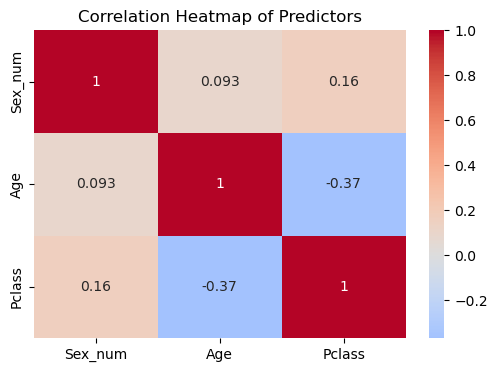

In [76]:

# Crear matriz de correlación
corr = df_model[['Sex_num', 'Age', 'Pclass']].corr()

# Graficar heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Predictors')
plt.show()